In [1]:
#from IPython.external import mathjax; mathjax.install_mathjax()
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import healpy.projector as pro
import astropy.io.fits as fits
from scipy.stats import gaussian_kde
import scipy
import pandas as pd
import pickle
matplotlib.style.use('seaborn-bright')
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import seaborn as sb

# Outline:
### Introduction:
  * What is anomalous microwave emission? (AME)
  * Why is AKARI useful?

### Our approach:
  * Compare Planck AME map with IR maps
  * Can we say more than "AME Correlates with dust"

### Results:
  * All-sky comparison - AME vs. IRC
  * $\lambda$ Orionis - 

### Discussion:
  * Can we rule out spinning dust?
  * What about effect of uncertainties on the correlation?
  * Do we need better AME data?

### Future (ongoing)) work:
  * Dust SED fittin (with help from Galliano-sensei)
  Tangential work:
  * Explore all-sky data with machine learning methods

In [2]:
lfi30ghz = hp.read_map('../../../Python/Projects/PlanckPCA/data/planck/LFI_SkyMap_030-BPassCorrected_0256_R2.01_full.fits')

NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


# Intro: What's in the microwave sky?

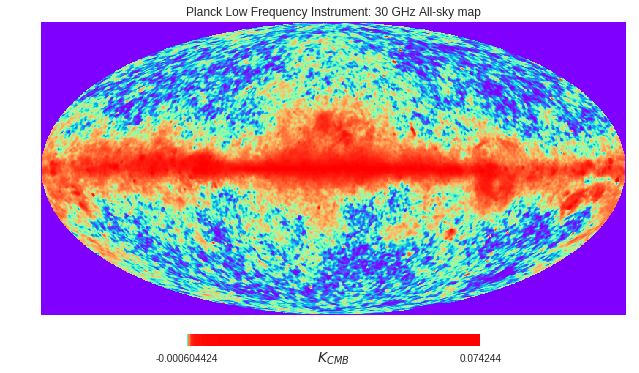

In [3]:
hp.mollview(lfi30ghz,
           title = 'Planck Low Frequency Instrument: 30 GHz All-sky map',
           norm = 'hist',
           cmap = 'rainbow',
           unit = '$K_{CMB}$')

![alt text](https://lambda.gsfc.nasa.gov/product/foreground/fg_images/Planck_A12_Fig24_left.png "Galactic Microwave Foreground SED")

###### From "Planck 2015 results. X. Diffuse component separation: Foreground maps":
`https://arxiv.org/abs/1502.01588`

# Our approach

* ### Compare AKARI, Planck, and IRAS maps to the Planck AME Component map:

  1. #### All-sky comparison
  2. #### Localized inspection of $\lambda$ Orionis

* ### Major caveats:
  * #### Limited to ~1-degree resolution
  * #### No "ground truth" AME map !!
  * #### Envrionmental variations not well constrained on an all-sky basis

### Intro: Why AKARI?

* #### Dominated by PAH emission features
* #### IRC 9 $\mu{}m$ to IRAS 12 $\mu{}m$ ratio may reveal trends in PAH ionization

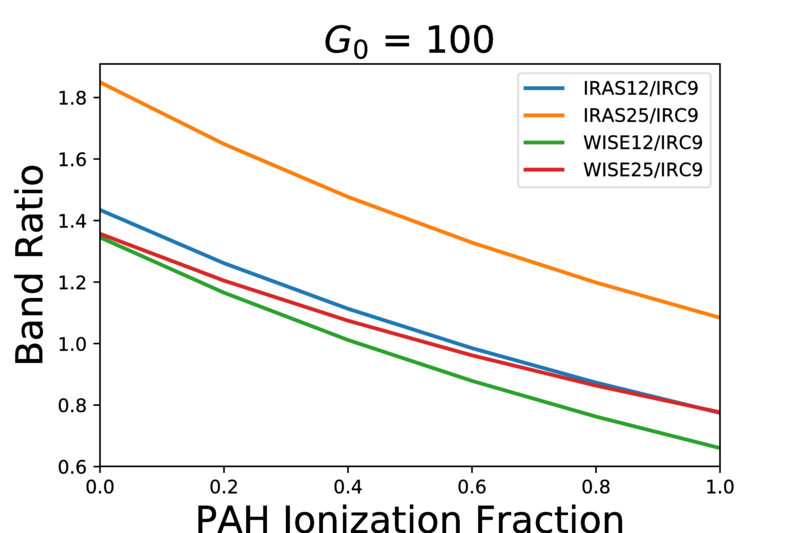

In [7]:
from IPython.display import Image 
from IPython.core.display import HTML 

PATH = "../Plots" 
Image(filename = PATH + "/png/band-ratio-G100.png")

  * $G_{0}$ indicates the interstellar radiation field relative to the solar neighborhood

# All-sky results

### Each IR band's intensity vs. AME Intensity:

In [ ]:
#### 2D Kernel Density plots

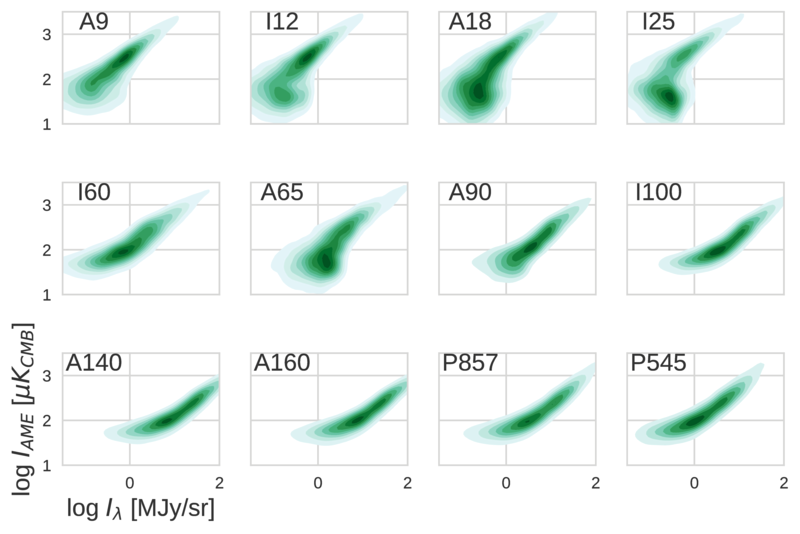

In [9]:
Image('../Plots/png/AMEvsDust_allsky_allbands__mpsub_kde.png')

## What if scale by the radiation field strength ($U$)?

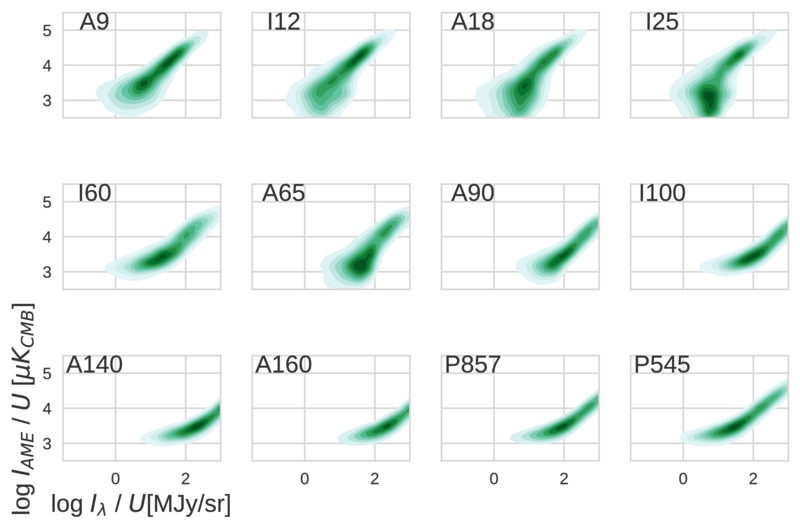

In [10]:
Image('../Plots/png/AMEvsDust_allsky_allbands__mpsub__UNorm_kde.png')

  * $U$ is approximated as the dust radiance $R$ divided by the optical depth $\tau_{353 GHz}$
  * $R$ and $\tau_{353 GHz}$ are from the Planck PR1 thermal dust parameter maps

### Spearman Correlation Matrix: 
IR Bands' Intensity and AME

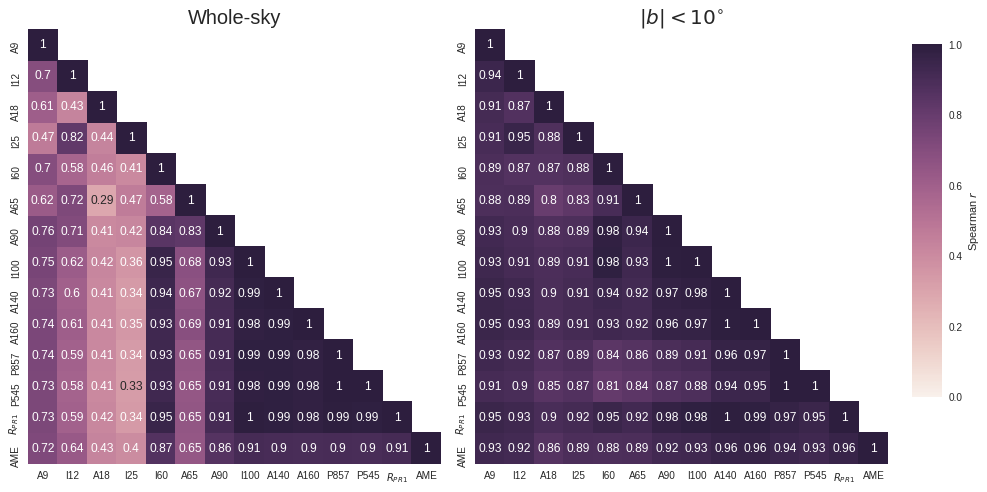

In [11]:
Image('../Plots/png/all_bands_corr_matrix_wAME_spearmanintensity.png')

#### Spearman Correlations: 
###### After normalizing data by  ISRF  ( ~ $\frac{R}{\tau_{353 GHz}}$)

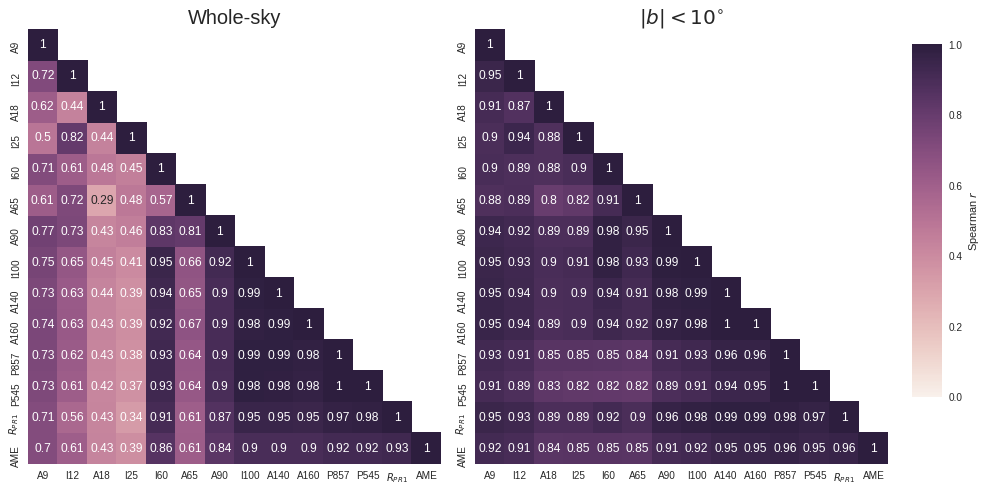

In [12]:
Image('../Plots/png/all_bands_corr_matrix_wAME_spearmanU_norm.png')

#### Almost no change when dividing by $U$

### Spatial Variation of Correlation Strength

### $I_{9}$ to   $I_{AME}$ correlation strength for ~10 degree patches:

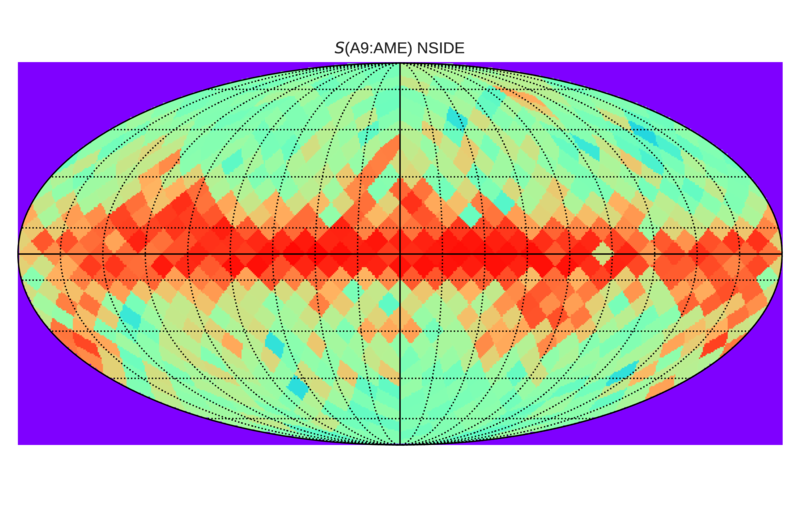

In [14]:
Image('../Plots/Allsky_Corr/Spearman_Map_nside8_A9toAME.png')

  * ###### Looks like a Galaxy...
  * ###### Weaker correlation at higher latitudes

### $I_{140}$ to   $I_{AME}$ correlation strength for ~10 degree patches:

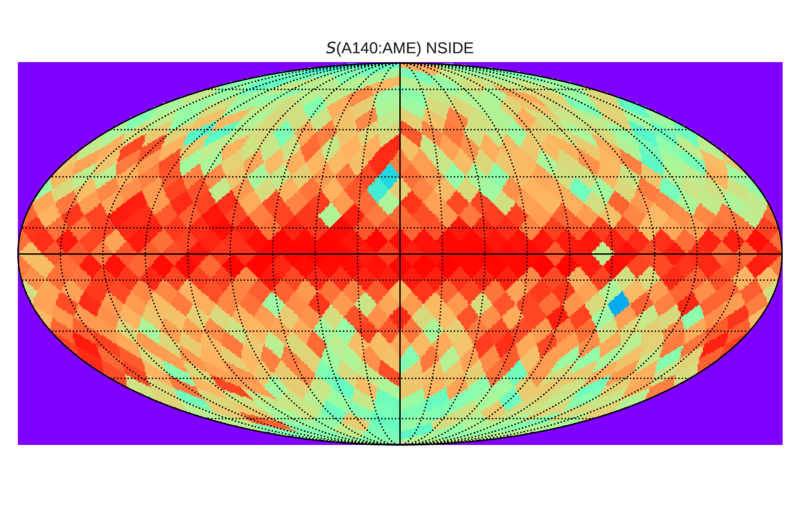

In [15]:
Image('../Plots/Allsky_Corr/Spearman_Map_nside8_A140toAME.png')

### What if we normalize by the dust radiance?

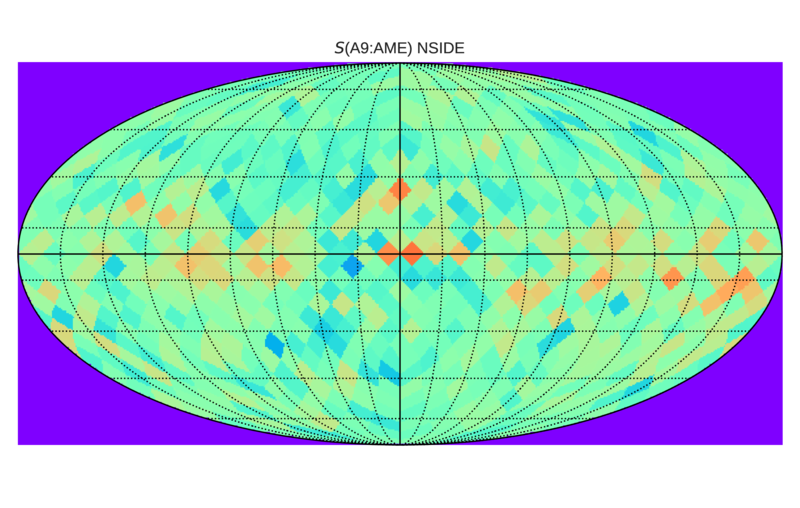

In [16]:
Image('../Plots/Allsky_Corr/RadNorm/Spearman_Map_nside8_A9toAME.png')

  * Now the map flattens-out
  * Consistent with Hensley+ (2016)
  * ...but is this indicating lack of AME:PAH correlation?
  * Are we encountering too much noise/systematic effects in the maps?

# $\lambda$  Orionis Results: 

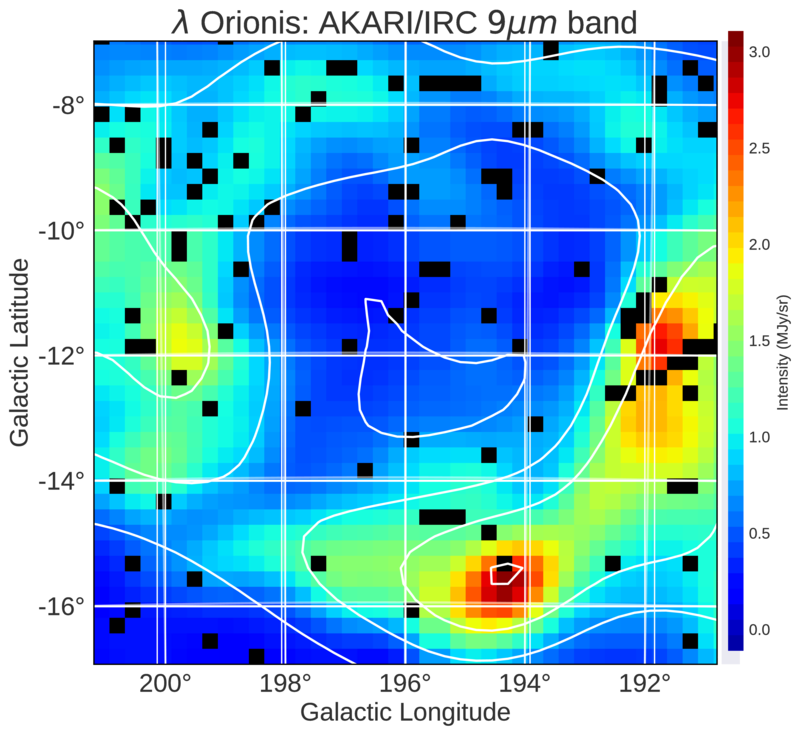

In [17]:
Image('../Plots/png/LOri_akari9_AMEcont_1dres.png')

  * The binary star $\lambda$ Orionis, is located near the center of the ring.

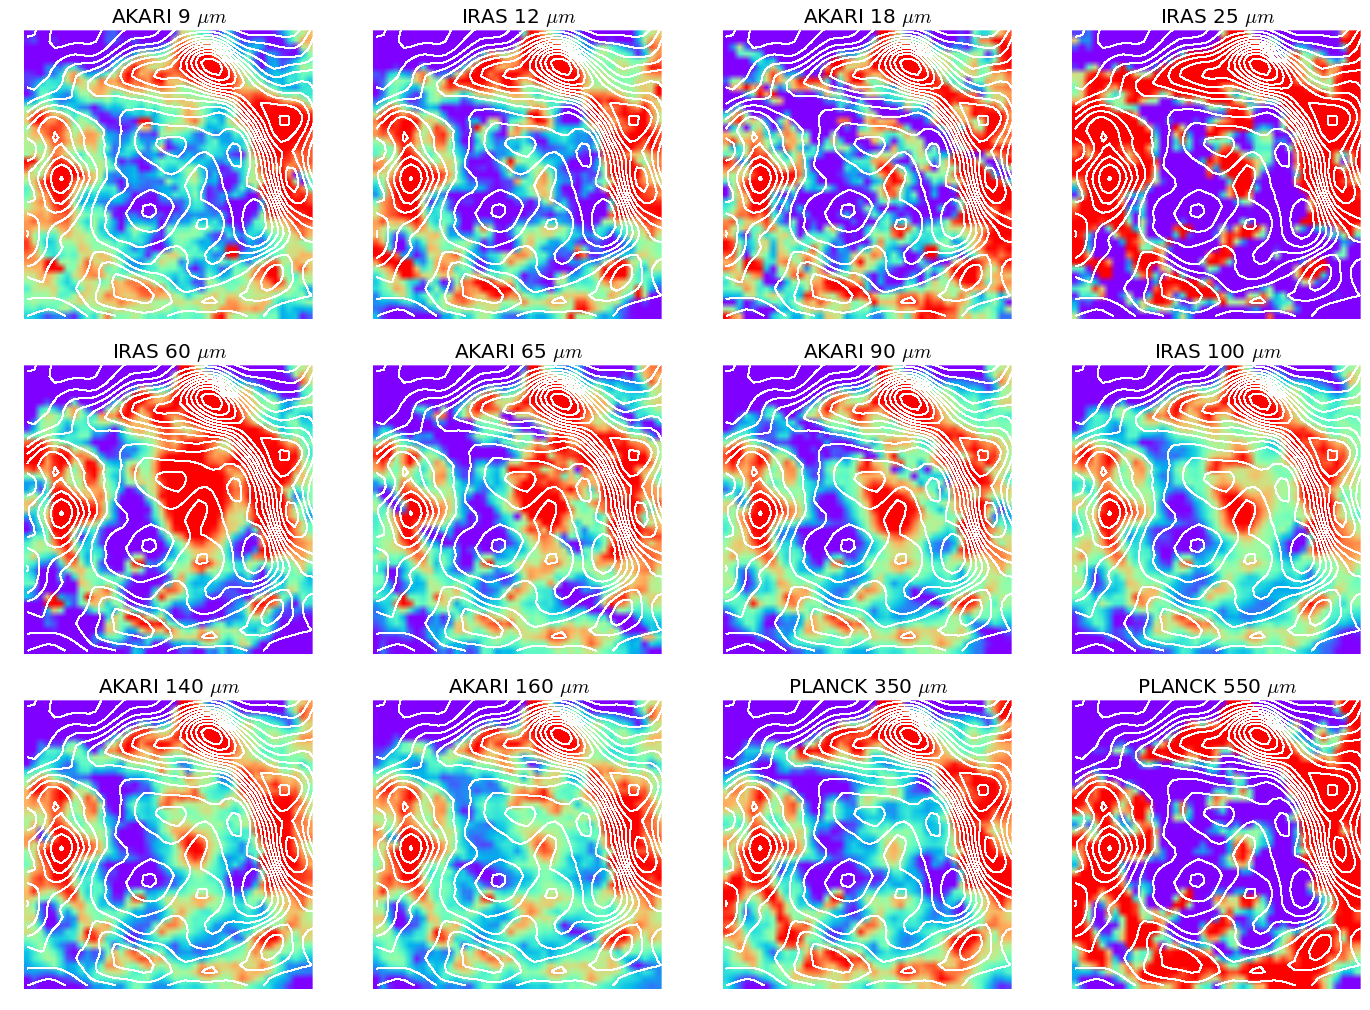

In [19]:
Image('../Plots/lOrionis_grid_img.png')

# $\lambda$  Orionis Results:
__Spearman Correlation Matrix__

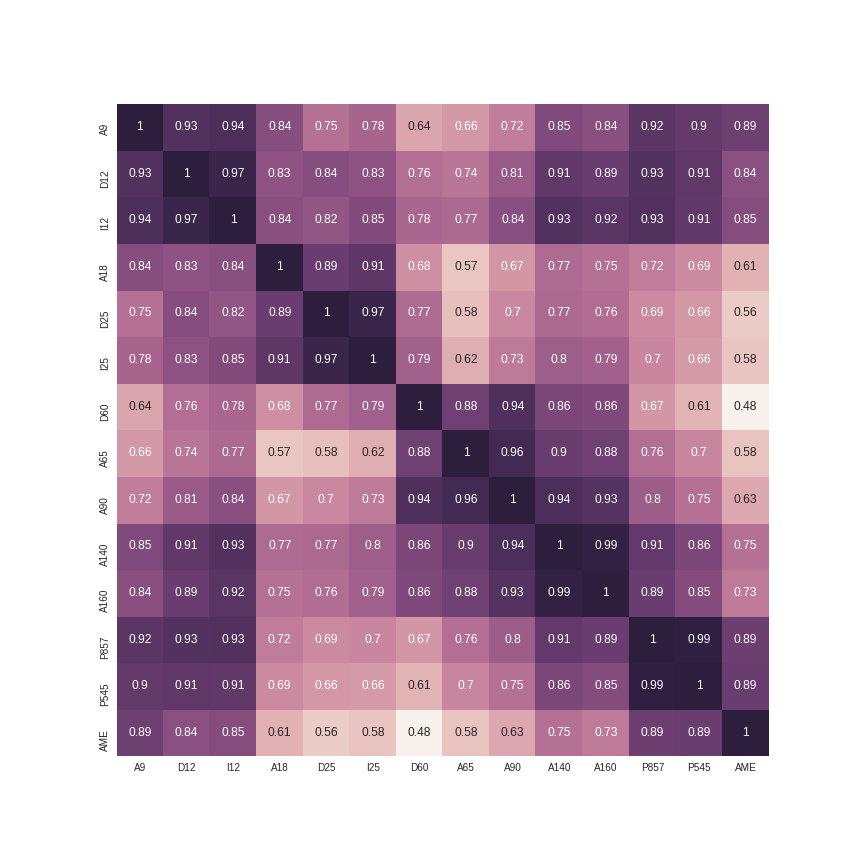

In [20]:
Image('../Plots/png/Allsky_corr_Lori.png')

  * #### 18 micron to 65 micron bands correlate the worst?
  * #### AME apparently weaker at higher $T_{dust}$ pixels
  * #### Destruction of PAHs in the center? Something else?
  * #### ..stay tuned for dust SED modeling (with help from F. Galliano)

# $\lambda$  Orionis Results:
#### What about PAH ionization fraction?

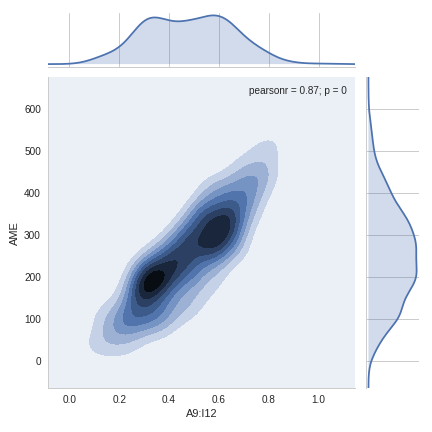

In [21]:
Image('../Plots/png/Lori_A9I12.png')

  * Stronger AME relates to higher 9 to 12 micron intensity ratio
  * Interesting because both bands are weak in the central region
  * PAH ionization fraction needs more attention...



# Conclusions:

 ## All-sky:
  * #### All-sky dust comparisons are a mess (see F. Boulanger's talk)

  * #### Present data do not rule out spinning-PAHs, however:

  * #### They also do not indicate exclusive PAH-AME relationship

## $\lambda$ Orionis

  * #### PAH-tracing emission correlates as well with AME as FIR in $\lambda$ Orionis

  * #### Correlation of 9 to 12 $\mu{}m$ ratio suggests PAH ionization needs more consideration.

### Open questions:
  * What about noise and systematic affects?
    * Effect on correlation tests

  * If not PAHs, what about other spinning stuff? (nanosilicates, etc. see T. Hoang's talk)
    * "What about the magnetic dust?" - Magnetic dipole emission not dead yet?

  * Do we know enough about the dust in different environments? (F. Boulanger's talk again)
  * How well do the Planck Component maps really constrain AME?

### Future (Ongoing) Work:
  * Dust SED modelling (with F. Galliano) -- taking consideration of uncertainties
  * Comparing Planck component separation with "blind" component separation techniques. (I.e. PCA, ICA, NMF)
    